# Exploratory Data Analysis For Covid 19 Pandemic in Malaysia (latest 26-08-2021)

## Covid 19 cases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import json
import plotly.express as px
import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = 'browser'
# import geopandas as gpd

%matplotlib inline
pd.set_option('display.expand_frame_repr', False)

In [2]:
data_Covid_Malaysia_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
data_Covid_Malaysia_State_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'
data_Covid_Population_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'

data_Covid_Malaysia = pd.read_csv(data_Covid_Malaysia_Url)
data_Covid_Malaysia_State = pd.read_csv(data_Covid_Malaysia_State_Url)
data_Population_Malaysia = pd.read_csv(data_Covid_Population_Url)

#the first entry, date 2020-03-16, its' data are cumulated from previous dates, so need to drop it
data_Covid_Malaysia.drop(index=data_Covid_Malaysia.index[:1], axis=0, inplace=True) 

#the first 16 entries, date 2020-03-16, its' data are cumulated from previous dates, so need to drop it
data_Covid_Malaysia_State.drop(index=data_Covid_Malaysia_State.index[:16], axis=0, inplace=True)
data_Covid_Malaysia_State.reset_index(drop=True, inplace=True)  #because we need to set the index started from 0 due to previous drop operation
data_Covid_Malaysia_State_Without_Date = data_Covid_Malaysia_State.drop(columns=['date'])  #date is unused for this dataset

In [3]:
data_Covid_Malaysia.head()  #show first 5 rows of the dataset

date  cases_new  cluster_import  cluster_religious  cluster_community  cluster_highRisk  cluster_education  cluster_detentionCentre  cluster_workplace
1  2020-01-26          0             NaN                NaN                NaN               NaN                NaN                      NaN                NaN
2  2020-01-27          0             NaN                NaN                NaN               NaN                NaN                      NaN                NaN
3  2020-01-28          0             NaN                NaN                NaN               NaN                NaN                      NaN                NaN
4  2020-01-29          3             NaN                NaN                NaN               NaN                NaN                      NaN                NaN
5  2020-01-30          1             NaN                NaN                NaN               NaN                NaN                      NaN                NaN

In [4]:
data_Covid_Malaysia_State.head()  #show first 5 rows of the dataset

date            state  cases_new
0  2020-01-26            Johor          0
1  2020-01-26            Kedah          0
2  2020-01-26         Kelantan          0
3  2020-01-26           Melaka          0
4  2020-01-26  Negeri Sembilan          0

In [5]:
data_Covid_Malaysia.shape  

(579, 9)

In [6]:
data_Covid_Malaysia_State.shape

(9264, 3)

In [7]:
data_Covid_Malaysia.dtypes

date                        object
cases_new                    int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object

In [8]:
data_Covid_Malaysia_State.dtypes

date         object
state        object
cases_new     int64
dtype: object

In [9]:
data_Covid_Malaysia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 1 to 579
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     579 non-null    object 
 1   cases_new                579 non-null    int64  
 2   cluster_import           238 non-null    float64
 3   cluster_religious        238 non-null    float64
 4   cluster_community        238 non-null    float64
 5   cluster_highRisk         238 non-null    float64
 6   cluster_education        238 non-null    float64
 7   cluster_detentionCentre  238 non-null    float64
 8   cluster_workplace        238 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 45.2+ KB


In [10]:
data_Covid_Malaysia_State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9264 entries, 0 to 9263
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       9264 non-null   object
 1   state      9264 non-null   object
 2   cases_new  9264 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 217.2+ KB


In [11]:
data_Covid_Malaysia.describe()  #only numeric columns are shown

cases_new  cluster_import  cluster_religious  cluster_community  cluster_highRisk  cluster_education  cluster_detentionCentre  cluster_workplace
count    579.000000       238.00000         238.000000         238.000000        238.000000         238.000000               238.000000         238.000000
mean    2833.918826         0.44958          33.827731         232.668067         28.613445          41.508403                85.168067         790.012605
std     4897.095487         3.79812          67.512585         191.625963         33.398024          78.085517                82.822093         478.933374
min        0.000000         0.00000           0.000000          19.000000          0.000000           0.000000                 0.000000          57.000000
25%       30.000000         0.00000           1.000000          88.000000          3.000000           0.000000                27.000000         360.250000
50%      959.000000         0.00000           7.000000         157.500000         15.000000          12.500000                63.500000         790.000000
75%     3301.500000         0.00000          26.750000         315.000000         43.750000          36.000000               111.000000        1163.000000
max    24599.000000        54.00000         359.000000         825.000000        189.000000         501.000000               439.000000        2338.000000

In [12]:
data_Covid_Malaysia_State.describe()  #only numeric columns are shown

cases_new
count  9264.000000
mean    177.119927
std     570.751227
min       0.000000
25%       0.000000
50%       6.000000
75%     113.250000
max    8792.000000

In [13]:
print(data_Population_Malaysia.shape)

print(data_Population_Malaysia.info())

print(data_Population_Malaysia.describe())

data_Population_Malaysia.set_index('state', inplace=True)

(17, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   17 non-null     object
 1   idxs    17 non-null     int64 
 2   pop     17 non-null     int64 
 3   pop_18  17 non-null     int64 
 4   pop_60  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 808.0+ bytes
None
            idxs           pop        pop_18        pop_60
count  17.000000  1.700000e+01  1.700000e+01  1.700000e+01
mean    8.000000  3.842047e+06  2.754071e+06  4.120000e+05
std     5.049752  7.597089e+06  5.448646e+06  8.107364e+05
min     0.000000  9.960000e+04  6.770000e+04  5.000000e+03
25%     4.000000  1.128800e+06  8.084000e+05  1.185000e+05
50%     8.000000  1.773700e+06  1.348600e+06  2.058000e+05
75%    12.000000  2.816500e+06  2.042700e+06  3.328000e+05
max    16.000000  3.265740e+07  2.340960e+07  3.502000e+06


In [14]:
data_Covid_Malaysia_Cases = data_Covid_Malaysia[['date', 'cases_new']]  
data_Covid_Malaysia_Cases.head()

date  cases_new
1  2020-01-26          0
2  2020-01-27          0
3  2020-01-28          0
4  2020-01-29          3
5  2020-01-30          1

In [15]:
month = data_Covid_Malaysia_Cases['date'].map(lambda x: x.split('-')[1])
year = data_Covid_Malaysia_Cases['date'].map(lambda x: x.split('-')[0])

NumToMonth = {     #library that map month number to month name
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'July',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

data_Covid_Malaysia_Cases_byMonth_and_Year = data_Covid_Malaysia_Cases.groupby(by=[year, month]).sum() #we group by year first, then only month

data_Covid_Malaysia_Cases_byMonth_and_Year.index.set_names(['year', 'month'], inplace=True)
data_Covid_Malaysia_Cases_byMonth_and_Year.rename(columns={'cases_new':'total_cases_per_month'}, inplace=True)

data_Covid_Malaysia_Cases_byMonth_and_Year.reset_index(inplace=True)  #to clear mutilple indexs 'year' and 'month'

for x in data_Covid_Malaysia_Cases_byMonth_and_Year.index:
    for key, value in NumToMonth.items():
        if data_Covid_Malaysia_Cases_byMonth_and_Year['month'][x] in key:
            data_Covid_Malaysia_Cases_byMonth_and_Year.loc[x,'month'] = value   #this is when converting month number to month name
            
data_Covid_Malaysia_Cases_byMonth_and_Year['year_month'] = data_Covid_Malaysia_Cases_byMonth_and_Year['year'] + ' ' + data_Covid_Malaysia_Cases_byMonth_and_Year['month']

#drop last row because right now we want to get the total cases for each month, we will get incorrect insights if we do not drop last row since last row does not contain full month data.
data_Covid_Malaysia_Cases_byMonth_and_Year.drop(data_Covid_Malaysia_Cases_byMonth_and_Year.tail(1).index,inplace=True) # drop last rows

data_Covid_Malaysia_Cases_byMonth_and_Year

year month  total_cases_per_month year_month
0   2020   Jan                      4   2020 Jan
1   2020   Feb                     21   2020 Feb
2   2020   Mar                   2737   2020 Mar
3   2020   Apr                   3236   2020 Apr
4   2020   May                   1817   2020 May
5   2020   Jun                    811   2020 Jun
6   2020  July                    346  2020 July
7   2020   Aug                    364   2020 Aug
8   2020   Sep                   1884   2020 Sep
9   2020   Oct                  20324   2020 Oct
10  2020   Nov                  34149   2020 Nov
11  2020   Dec                  47313   2020 Dec
12  2021   Jan                 101949   2021 Jan
13  2021   Feb                  85793   2021 Feb
14  2021   Mar                  44748   2021 Mar
15  2021   Apr                  63213   2021 Apr
16  2021   May                 163644   2021 May
17  2021   Jun                 179622   2021 Jun
18  2021  July                 361293  2021 July

## Data visualization

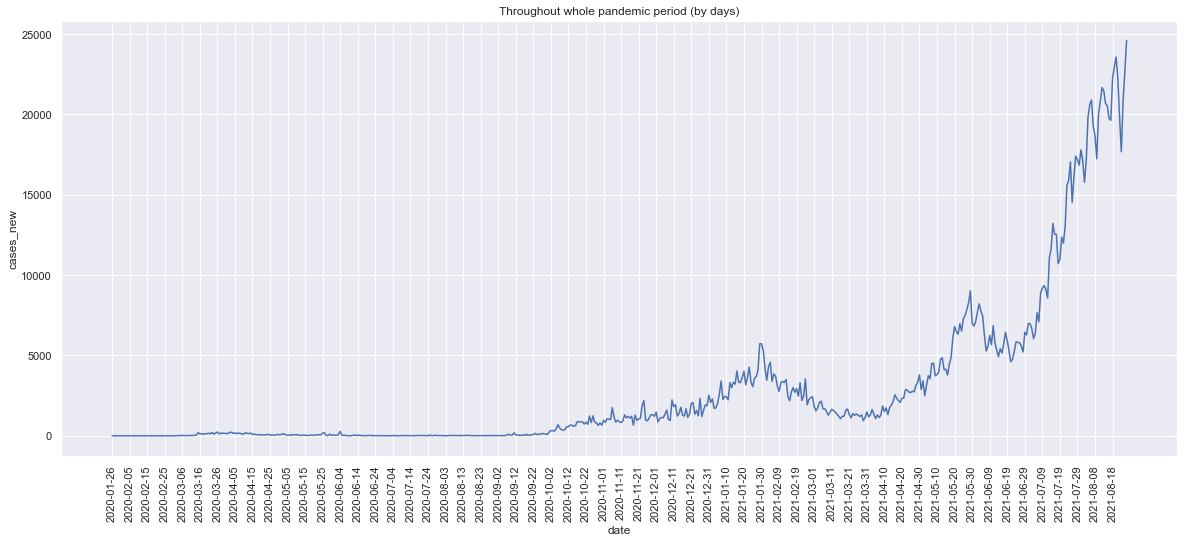

In [16]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid") #to make the background more pleasing and easy to be visualized
sns.lineplot(x='date', y='cases_new', data=data_Covid_Malaysia)
plt.xticks(np.arange(0, len(data_Covid_Malaysia), step=10), rotation=90)     
plt.title('Throughout whole pandemic period (by days)')
plt.show()

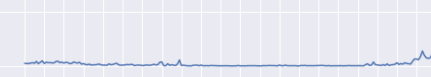

from this image we can see that there are not much different throughout first few months, so we better use log scale method to see the details for said periods. 

Now let's see if we change from linear scale to log scale (base 10) 

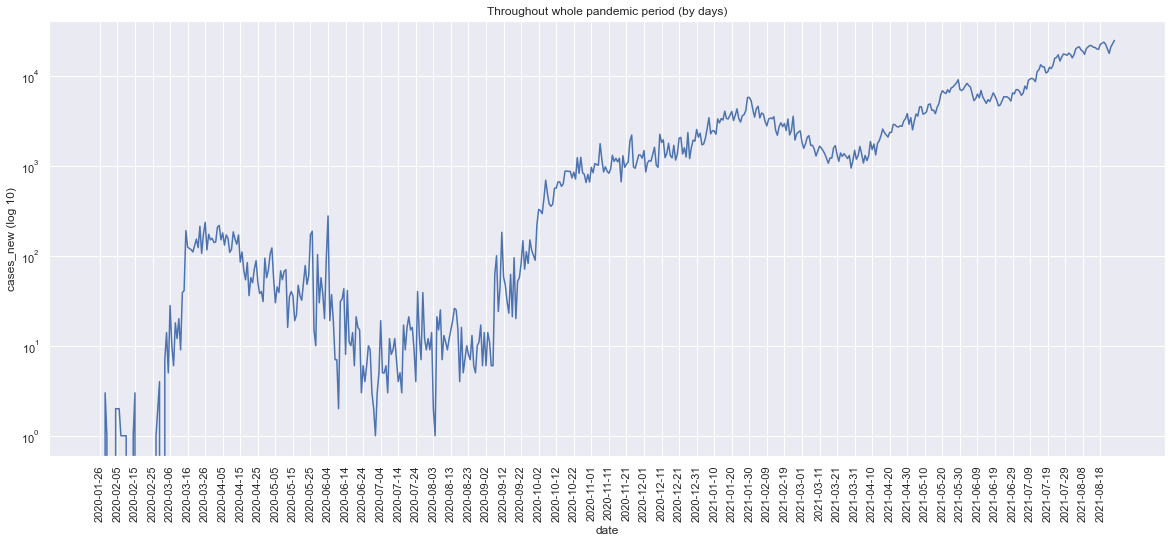

In [17]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid") #to make the background more pleasing and easy to be visualized
sns.lineplot(x='date', y='cases_new', data=data_Covid_Malaysia)
plt.yscale('log', base=10) 
plt.xticks(np.arange(0, len(data_Covid_Malaysia), step=10), rotation=90)     
plt.title('Throughout whole pandemic period (by days)')
plt.ylabel("cases_new (log 10)")
plt.show()

so now we can see the details cleary for the first few months

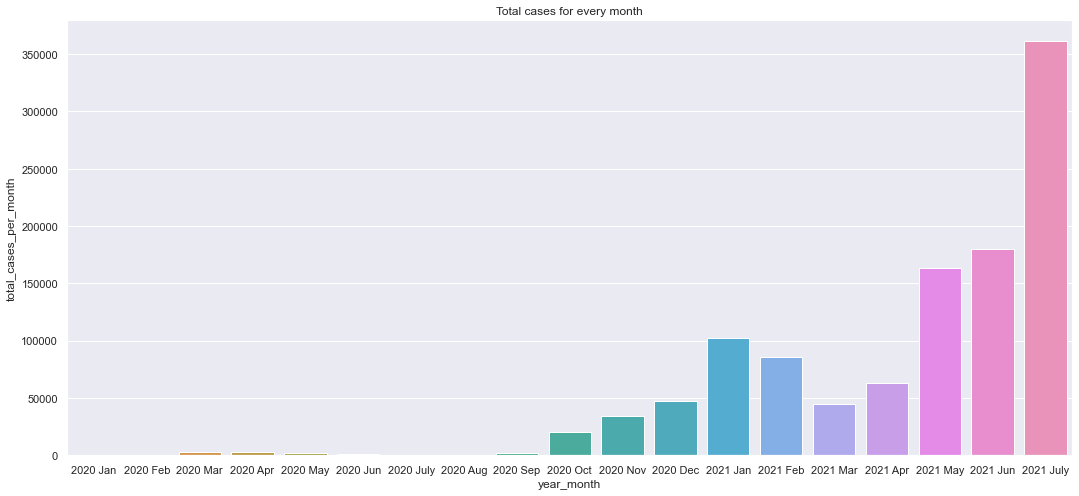

In [18]:
plt.figure(figsize=(18,8))
sns.barplot(x="year_month", y="total_cases_per_month", data=data_Covid_Malaysia_Cases_byMonth_and_Year)
plt.xticks(rotation=0)     
plt.title('Total cases for every month')
plt.show()

In [19]:
data_Covid_Malaysia_State_total = data_Covid_Malaysia_State_Without_Date.groupby(by='state').sum().sort_values('cases_new', ascending=False)

data_Covid_Malaysia_State_total.rename(columns={'cases_new':'total_cases_per_state'}, inplace=True)
data_Covid_Malaysia_State_total

total_cases_per_state
state                                   
Selangor                          579732
W.P. Kuala Lumpur                 168705
Sabah                             134517
Johor                             128662
Sarawak                           105072
Negeri Sembilan                    89980
Kedah                              89027
Pulau Pinang                       77852
Kelantan                           71083
Perak                              62537
Melaka                             46252
Pahang                             40519
Terengganu                         30324
W.P. Labuan                         9791
W.P. Putrajaya                      5197
Perlis                              1589

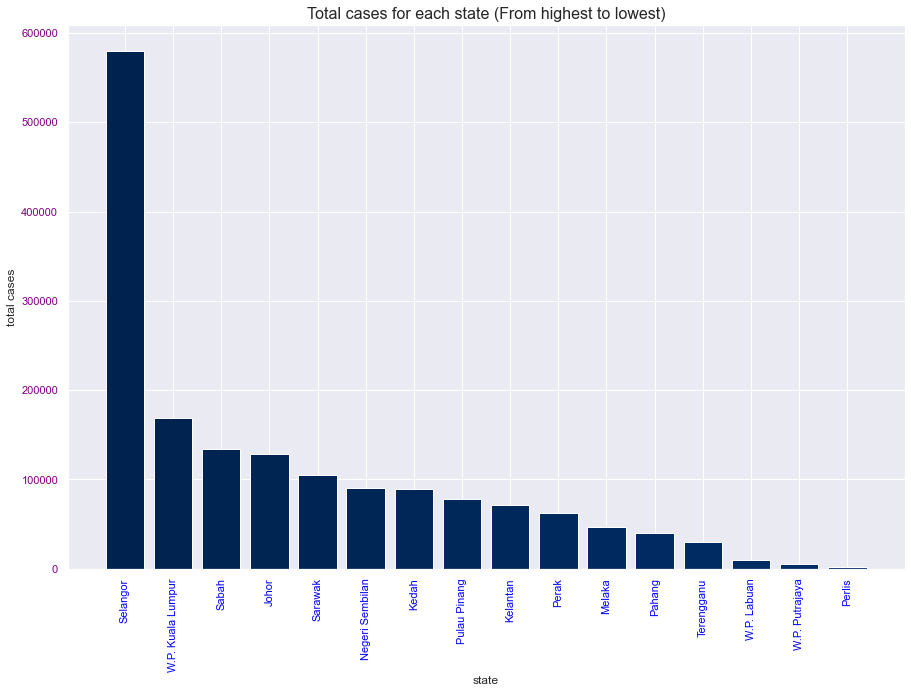

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
my_cmap = plt.get_cmap("cividis")
ax.bar(x=data_Covid_Malaysia_State_total.index, height=data_Covid_Malaysia_State_total['total_cases_per_state'], color=my_cmap.colors)
ax.set_title('Total cases for each state (From highest to lowest)', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(data_Covid_Malaysia_State_total.index, rotation=90)
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='purple')
ax.set_xlabel('state')
ax.set_ylabel('total cases')
plt.show()

In [21]:
data_Covid_Malaysia_Cases_Pop = data_Covid_Malaysia_State_total.merge(data_Population_Malaysia['pop'], copy=False, how='inner', on='state')   
#now we join 2 dataset together based on 'state' column

data_Covid_Malaysia_Cases_Pop

total_cases_per_state      pop
state                                            
Selangor                          579732  6538000
W.P. Kuala Lumpur                 168705  1773700
Sabah                             134517  3908500
Johor                             128662  3781000
Sarawak                           105072  2816500
Negeri Sembilan                    89980  1128800
Kedah                              89027  2185100
Pulau Pinang                       77852  1773600
Kelantan                           71083  1906700
Perak                              62537  2510300
Melaka                             46252   932700
Pahang                             40519  1678700
Terengganu                         30324  1259300
W.P. Labuan                         9791    99600
W.P. Putrajaya                      5197   110000
Perlis                              1589   254900

In [22]:
data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'] = round(data_Covid_Malaysia_Cases_Pop['total_cases_per_state'] / data_Covid_Malaysia_Cases_Pop['pop'] * 100, 2)
data_Covid_Malaysia_Cases_Pop

total_cases_per_state      pop  cases_population_percentage (%)
state                                                                             
Selangor                          579732  6538000                             8.87
W.P. Kuala Lumpur                 168705  1773700                             9.51
Sabah                             134517  3908500                             3.44
Johor                             128662  3781000                             3.40
Sarawak                           105072  2816500                             3.73
Negeri Sembilan                    89980  1128800                             7.97
Kedah                              89027  2185100                             4.07
Pulau Pinang                       77852  1773600                             4.39
Kelantan                           71083  1906700                             3.73
Perak                              62537  2510300                             2.49
Melaka                             46252   932700                             4.96
Pahang                             40519  1678700                             2.41
Terengganu                         30324  1259300                             2.41
W.P. Labuan                         9791    99600                             9.83
W.P. Putrajaya                      5197   110000                             4.72
Perlis                              1589   254900                             0.62

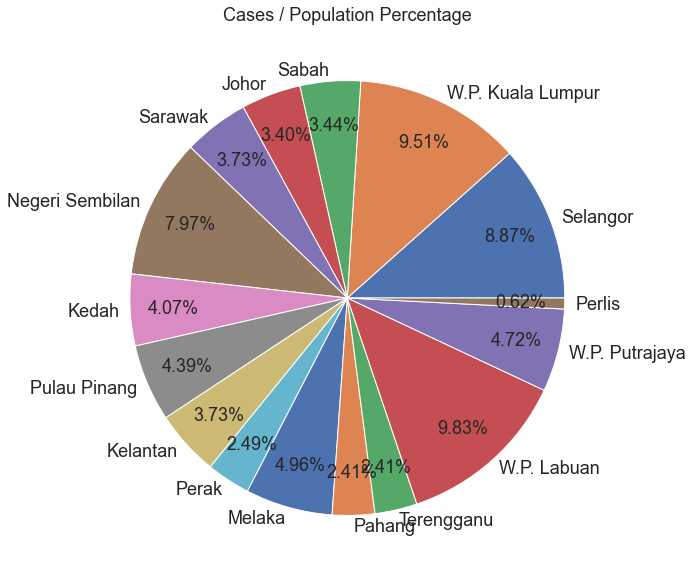

In [23]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 18.0
patches, texts, autotexts = plt.pie(data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'], 
                                    labels = data_Covid_Malaysia_Cases_Pop.index, 
                                    autopct=lambda x: '{:.2f}%'.format(x*data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'].sum()/100), 
                                    pctdistance=0.8, 
                                    labeldistance=1.05
                                    )
[ text.set_fontsize(18) for text in texts ]  #list comprehension, set every label font to desired size
plt.title('Cases / Population Percentage', fontsize = 18)
plt.show()

In [24]:
data_Covid_Malaysia_Cases_Pop_Sorted = data_Covid_Malaysia_Cases_Pop.sort_values('cases_population_percentage (%)', ascending=False)
data_Covid_Malaysia_Cases_Pop_Sorted.head(5)

total_cases_per_state      pop  cases_population_percentage (%)
state                                                                             
W.P. Labuan                         9791    99600                             9.83
W.P. Kuala Lumpur                 168705  1773700                             9.51
Selangor                          579732  6538000                             8.87
Negeri Sembilan                    89980  1128800                             7.97
Melaka                             46252   932700                             4.96

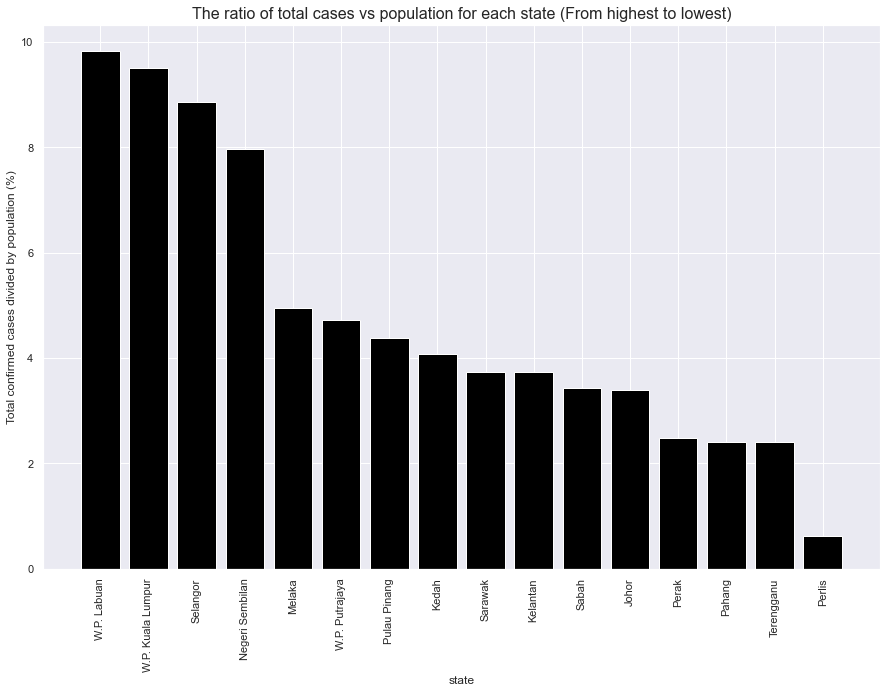

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x=data_Covid_Malaysia_Cases_Pop_Sorted.index, height=data_Covid_Malaysia_Cases_Pop_Sorted['cases_population_percentage (%)'], color='black')
ax.set_title('The ratio of total cases vs population for each state (From highest to lowest)', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xlabel("state")
ax.set_ylabel("Total confirmed cases divided by population (%)")
ax.set_xticklabels(data_Covid_Malaysia_Cases_Pop_Sorted.index, rotation=90)
plt.show()

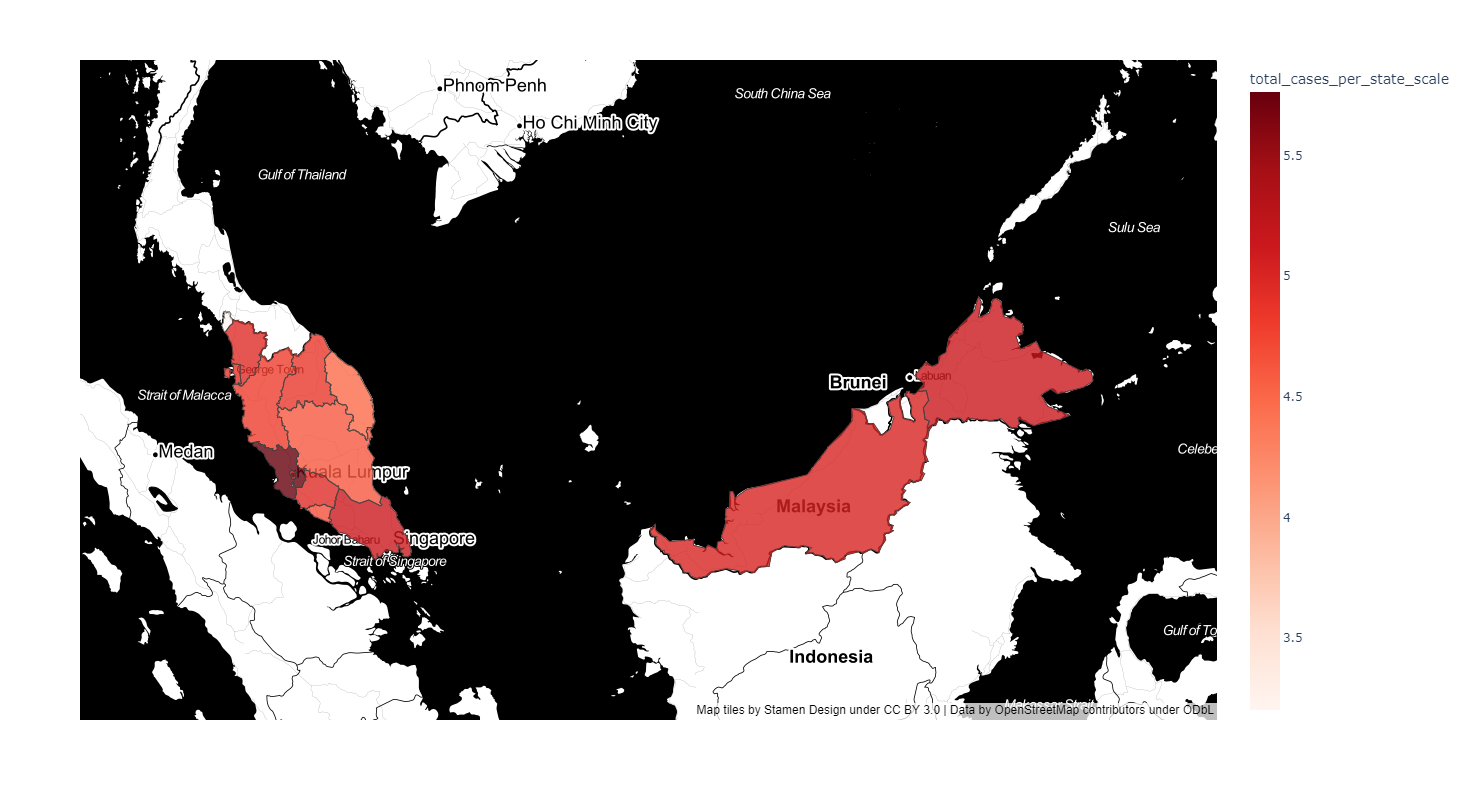

In [26]:
malaysia_states = json.load(open('malaysia.geojson', 'r'))

# data_Covid_Malaysia_Cases_Pop['id'] = range(1, 1+len(data_Covid_Malaysia_Cases_Pop))

state_id_geojson = {}  #declare dictionary
for feature in malaysia_states['features']:
    feature['id'] = feature['properties']['cartodb_id']
    state_id_geojson[feature['properties']['name']] = feature['id']

# W.P. Labuan does not have its coordinates currently
data_Covid_Malaysia_Cases_Pop_reset_index = data_Covid_Malaysia_Cases_Pop[data_Covid_Malaysia_Cases_Pop.index != 'W.P. Labuan'].reset_index() 

# match the name between geojson and dataset, so we change the keys in dict
state_id_geojson['W.P. Kuala Lumpur'] = state_id_geojson.pop('Federal Territory of Kuala Lumpur')
state_id_geojson['Pulau Pinang'] = state_id_geojson.pop('Penang')
state_id_geojson['W.P. Putrajaya'] = state_id_geojson.pop('Federal Territory of Putrajaya')

data_Covid_Malaysia_Cases_Pop_reset_index['id'] = data_Covid_Malaysia_Cases_Pop_reset_index['state'].apply(lambda x: state_id_geojson[x])
data_Covid_Malaysia_Cases_Pop_reset_index['total_cases_per_state_scale'] = np.log10(data_Covid_Malaysia_Cases_Pop_reset_index['total_cases_per_state']) # because the data is widely spread, we have to scale the data by logarithmic scale technique 

fig = px.choropleth_mapbox(data_Covid_Malaysia_Cases_Pop_reset_index, 
                    locations='id', 
                    geojson=malaysia_states, 
                    color='total_cases_per_state_scale', 
                    hover_name='state',
                    hover_data=['total_cases_per_state'],
                    mapbox_style='stamen-toner',
                    center={'lat': 5, 'lon': 109.5},
                    zoom=5,
                    color_continuous_scale=px.colors.sequential.Reds,
                    opacity=0.8)
fig.update_geos(fitbounds='locations', visible=False)
fig.update_layout(width=1200, height=800)
            
fig.show()

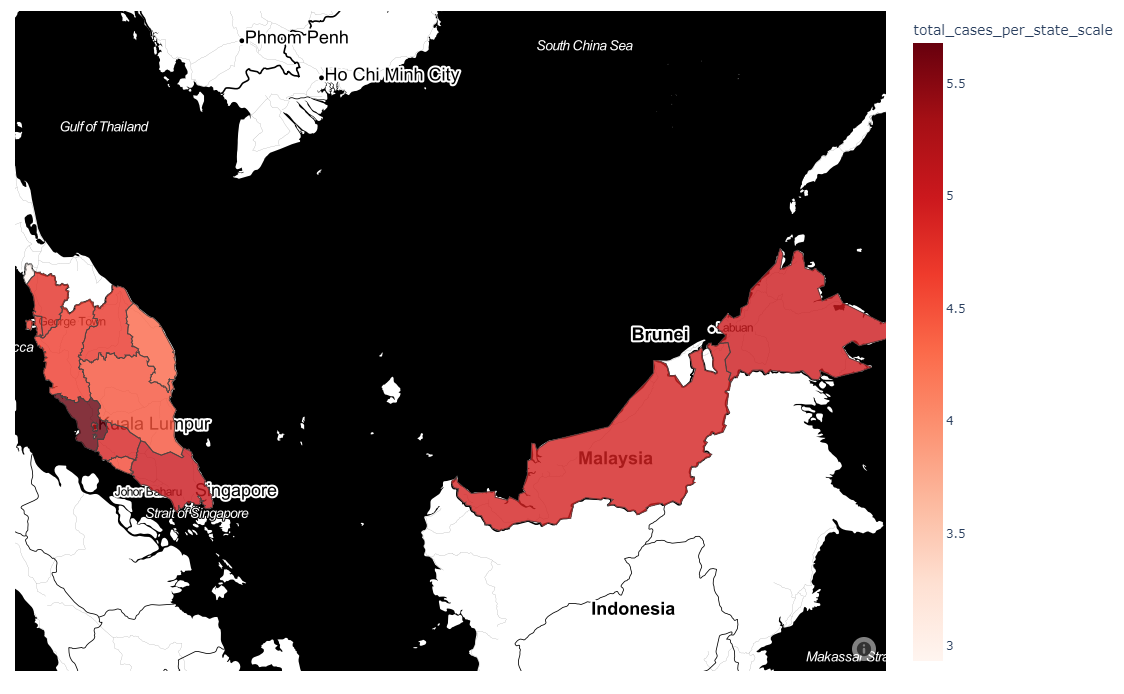

*note: the above map is rendered from my local jupyterlab, because this map cannot be rendered in github. you can clcik on 'external view availble with nbviewver' at the top right corner to see the map details.
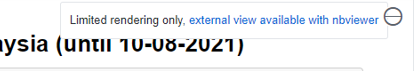 

the above map shows that the total covid-19 confirmed cases happened in each state. the saturity of each area represents the severity of circumstances. More saturated it is, then more number of cases.

## Vaccination Process

In [27]:
data_Vaccine_Malaysia_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv'
data_Vaccine_State_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_state.csv'
data_Vaccine_Registration_Malaysia_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_malaysia.csv'
data_Vaccine_Registration_State_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_state.csv'

data_Vaccine_Malaysia = pd.read_csv(data_Vaccine_Malaysia_Url)
data_Vaccine_State = pd.read_csv(data_Vaccine_State_Url)
data_Vaccine_Registration_Malaysia = pd.read_csv(data_Vaccine_Registration_Malaysia_Url)
data_Vaccine_Registration_State = pd.read_csv(data_Vaccine_Registration_State_Url)

In [28]:
print(data_Vaccine_Malaysia.isna().sum())
print(data_Vaccine_State.isna().sum())
print(data_Vaccine_Registration_Malaysia.isna().sum())
print(data_Vaccine_Registration_State.isna().sum())

date             0
daily_partial    0
daily_full       0
daily            0
cumul_partial    0
cumul_full       0
cumul            0
pfizer1          0
pfizer2          0
sinovac1         0
sinovac2         0
astra1           0
astra2           0
pending          0
dtype: int64
date             0
state            0
daily_partial    0
daily_full       0
daily            0
cumul_partial    0
cumul_full       0
cumul            0
pfizer1          0
pfizer2          0
sinovac1         0
sinovac2         0
astra1           0
astra2           0
pending          0
dtype: int64
date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64
date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64


In [29]:
print(data_Vaccine_Malaysia.info())
print(data_Vaccine_State.info())
print(data_Vaccine_Registration_Malaysia.info())
print(data_Vaccine_Registration_State.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           183 non-null    object
 1   daily_partial  183 non-null    int64 
 2   daily_full     183 non-null    int64 
 3   daily          183 non-null    int64 
 4   cumul_partial  183 non-null    int64 
 5   cumul_full     183 non-null    int64 
 6   cumul          183 non-null    int64 
 7   pfizer1        183 non-null    int64 
 8   pfizer2        183 non-null    int64 
 9   sinovac1       183 non-null    int64 
 10  sinovac2       183 non-null    int64 
 11  astra1         183 non-null    int64 
 12  astra2         183 non-null    int64 
 13  pending        183 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 20.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 


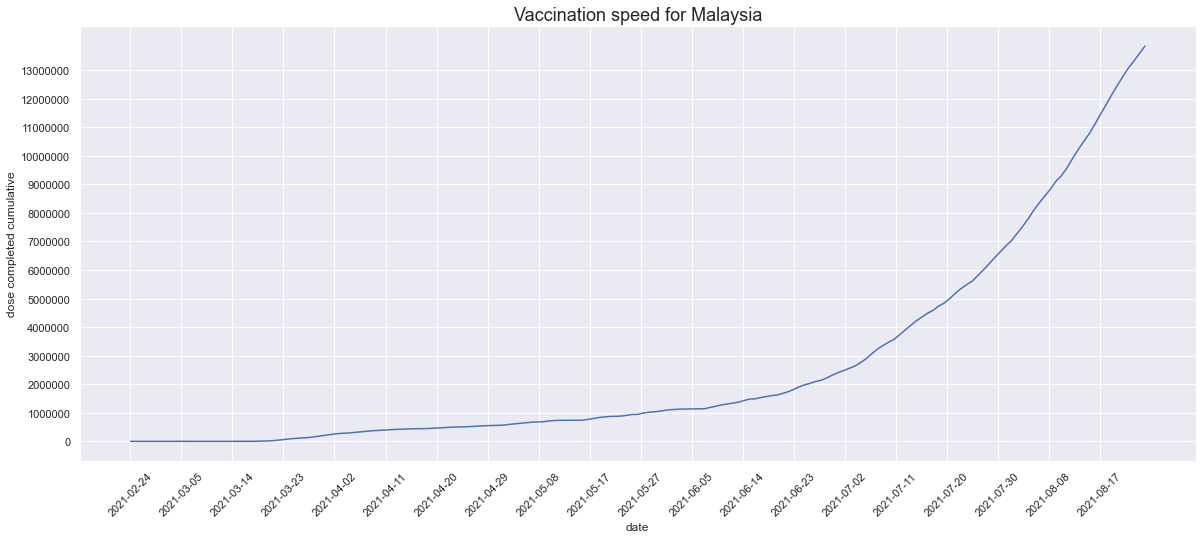

In [30]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data_Vaccine_Malaysia, x='date', y='cumul_full')  #we use dose2_cumul a.k.a second dose cumulative is because we want to know who are completed vaccinated
plt.xticks(np.arange(0, len(data_Vaccine_Malaysia), step=len(data_Vaccine_Malaysia) / 20), rotation=45)
plt.yticks(np.arange(0, max(data_Vaccine_Malaysia.cumul_full), step=1000000))
plt.ticklabel_format(axis='y', scilimits=(0, len(data_Vaccine_Malaysia.cumul_full)))  #this is set y scale from exponent value to actual value
plt.xlabel('date')
plt.ylabel('dose completed cumulative')
plt.title('Vaccination speed for Malaysia', fontsize=18)
plt.show()

          date              state  daily_partial  daily_full  daily  cumul_partial  cumul_full    cumul  pfizer1  pfizer2  sinovac1  sinovac2  astra1  astra2  pending      pop
0   2021-08-25              Johor          31221       38127  69348        1948209     1129279  3077488    18954    27674     10036      6740    1959    3087      898  3781000
1   2021-08-25              Kedah          21026       13999  35025         987048      619577  1606625    18476    10804       398      2822    2041      90      394  2185100
2   2021-08-25           Kelantan          12814       19057  31871         691374      503902  1195276     9928    18496      1997        80     600      23      747  1906700
3   2021-08-25             Melaka           3081       14801  17882         516872      343118   859990      412    14620      2650        27       0       0      173   932700
4   2021-08-25    Negeri Sembilan           8071        8650  16721         748658      606482  1355140     7127     504

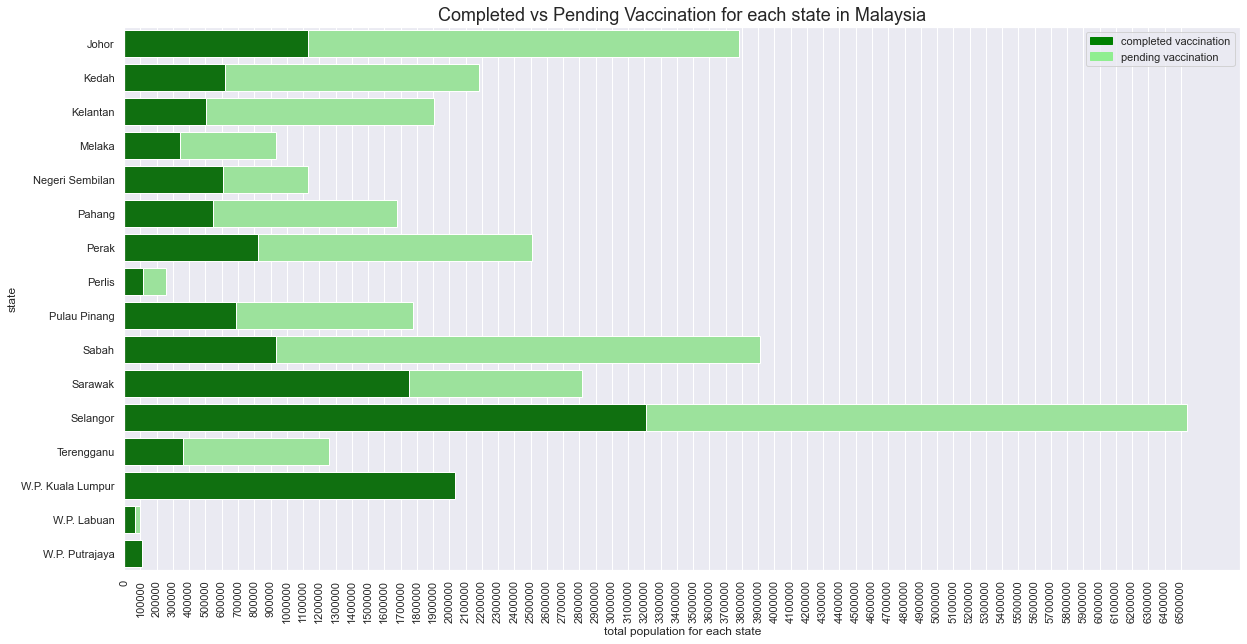

In [31]:
latest_date = data_Vaccine_State['date'].tail(1).values  #to get the latest date
data_Vaccine_State_Total = data_Vaccine_State[data_Vaccine_State.date == latest_date[0]]   #because latest_date will return array, latest_date[0] will return first string element 

data_Vaccine_State_Total_Pop = data_Vaccine_State_Total.merge(data_Covid_Malaysia_Cases_Pop['pop'], how='inner', on='state')

print(data_Vaccine_State_Total_Pop)

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
# sns.set_palette("Greens_r", n_colors=len(data_Vaccine_State_Total))
sns.barplot(data=data_Vaccine_State_Total_Pop, x='pop', y='state', color='lightgreen')
sns.barplot(data=data_Vaccine_State_Total_Pop, x='cumul_full', y='state', color='green', estimator=sum)   #we use dose2_cumul a.k.a second dose cumulative is because we want to know who are completed vaccinated

#create legend
left_bar = mpatches.Patch(color='green', label='completed vaccination')
right_bar = mpatches.Patch(color='lightgreen', label='pending vaccination')
plt.legend(handles=[left_bar, right_bar])

plt.xticks(rotation=90)
plt.xticks(np.arange(0, max(data_Vaccine_State_Total_Pop['pop']), step=100000))
plt.ticklabel_format(axis='x', scilimits=(0, len(data_Vaccine_State_Total_Pop['pop'])))
plt.xlabel('total population for each state')
plt.ylabel('state')
plt.title('Completed vs Pending Vaccination for each state in Malaysia', fontsize=18)
plt.show()

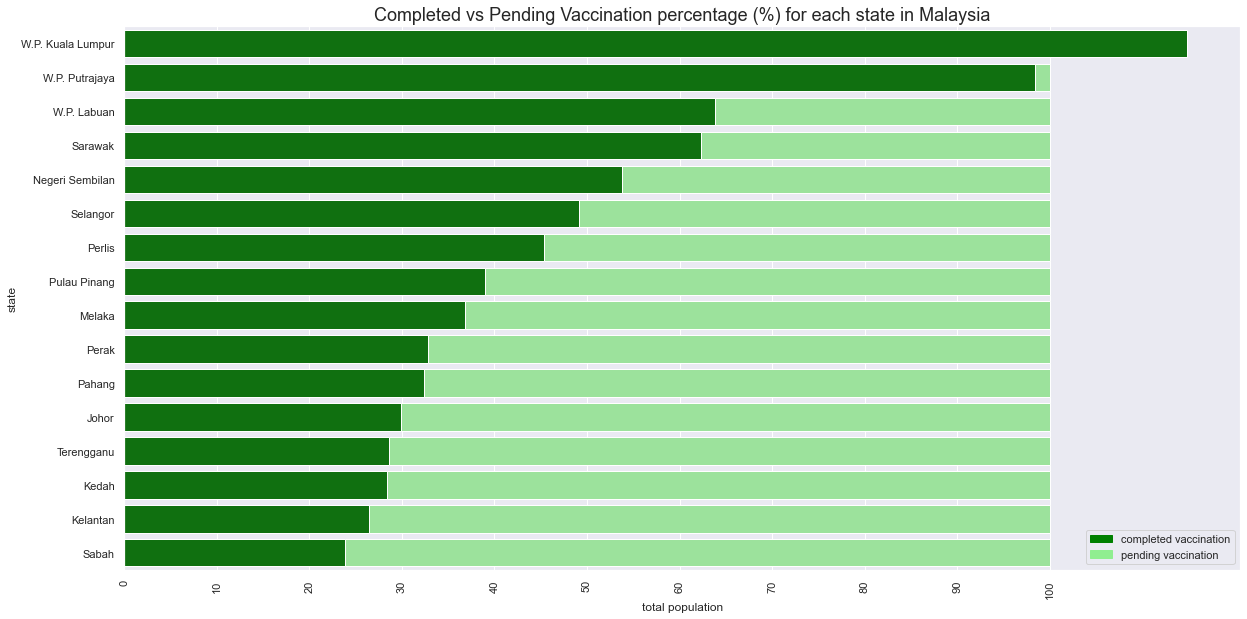

In [32]:
data_Vaccine_State_Total_Pop['dose2_cumul_percentage'] = [i / j * 100 for i,j in zip(data_Vaccine_State_Total_Pop['cumul_full'], data_Vaccine_State_Total_Pop['pop'])]
data_Vaccine_State_Total_Pop['total_population_percentage'] = [i / j * 100 for i,j in zip(data_Vaccine_State_Total_Pop['pop'], data_Vaccine_State_Total_Pop['pop'])]

plt.figure(figsize=(20, 10))
# sns.set_palette("Greens_r", n_colors=len(data_Vaccine_State_Total))
sns.barplot(data=data_Vaccine_State_Total_Pop, x='total_population_percentage', y='state', color='lightgreen')
sns.barplot(data=data_Vaccine_State_Total_Pop.sort_values('dose2_cumul_percentage', ascending=False), x='dose2_cumul_percentage', y='state', color='green')   #we use dose2_cumul a.k.a second dose cumulative is because we want to know who are completed vaccinated

#create legend
left_bar = mpatches.Patch(color='green', label='completed vaccination')
right_bar = mpatches.Patch(color='lightgreen', label='pending vaccination')
plt.legend(handles=[left_bar, right_bar])

plt.xticks(rotation=90)
plt.xticks(np.arange(0, 110, step=10))
plt.xlabel('total population')
plt.ylabel('state')
plt.title('Completed vs Pending Vaccination percentage (%) for each state in Malaysia', fontsize=18)
plt.show()

The result for some states, for example KL, the total number of people who are vaccinated might exceed the population due to the fact that some vaccine centres are opened for foreign workers. 

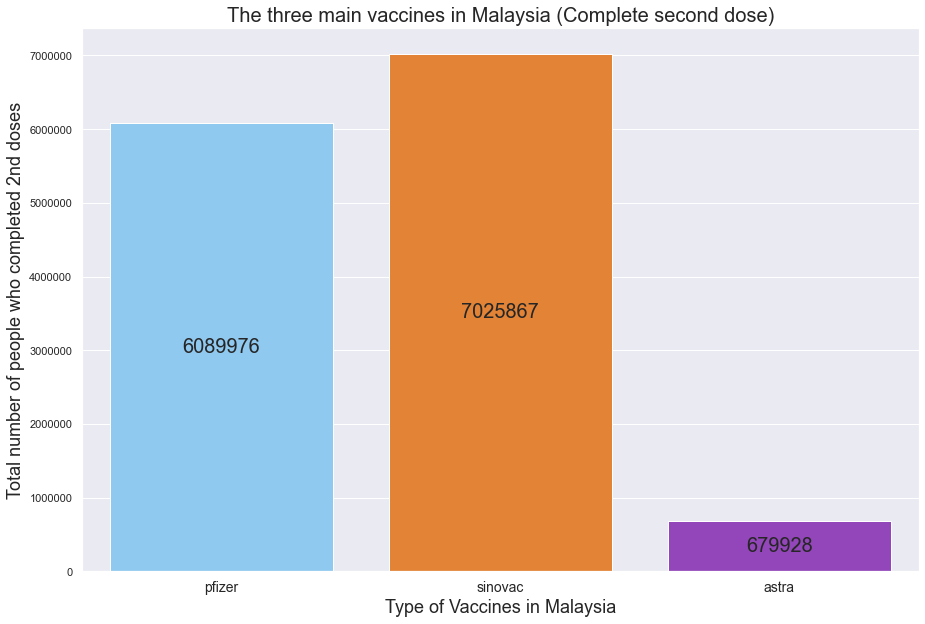

In [33]:
data_sum_vaccine = data_Vaccine_Malaysia[['pfizer2', 'sinovac2', 'astra2']].sum()
data_sum_vaccine_to_frame = pd.Series(data_sum_vaccine, name='Total').to_frame().rename_axis('Name').reset_index()
data_sum_vaccine_to_frame['Name'].replace({'pfizer2': 'pfizer', 'sinovac2': 'sinovac', 'astra2': 'astra'}, inplace=True)

sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)    #this is set the y-axis from exponential form to actual value form, exp: 1e^6 to 1000000
sns.barplot(x='Name', y='Total', data = data_sum_vaccine_to_frame, palette=[(0.5, 0.8, 1), (1, 0.5, 0.1), (0.6, 0.2, 0.8)])  #use rgb (limit from 0 to 1) to fill each bar plot
ax.bar_label(ax.containers[0], label_type='center', labels=[data_sum_vaccine_to_frame.iloc[0,1], data_sum_vaccine_to_frame.iloc[1,1], data_sum_vaccine_to_frame.iloc[2,1]], size=20)
plt.xticks(fontsize=14)
plt.xlabel('Type of Vaccines in Malaysia', fontsize=18)
plt.ylabel('Total number of people who completed 2nd doses', fontsize=18)
plt.title('The three main vaccines in Malaysia (Complete second dose)', fontsize=20)
plt.show()

### Positive rate and death rate

In [34]:
data_test_Malaysia_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv'
data_deaths_Malaysia_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv'
data_test_Malaysia = pd.read_csv(data_test_Malaysia_Url)
data_deaths_Malaysia = pd.read_csv(data_deaths_Malaysia_Url)
data_test_Malaysia.head()
data_deaths_Malaysia.head()

date  deaths_new
0  2020-03-17           2
1  2020-03-18           0
2  2020-03-19           0
3  2020-03-20           1
4  2020-03-21           5

rtk-ag - The Antigen Rapid Test Kit (RTK-Ag) is also a common method used in Malaysia to determine if you have contracted the virus. This method detects viral protein related to the coronavirus to determine a reactive or non-reactive result.  As the name suggests, the rapid test is a faster method of detecting the virus in the body and can take as quickly as 15 minutes to acquire the results. Typically, the rapid test only requires a swab sample from the nose to yield results of reactive or non-reactive.

pcr - PCR stands for a polymerase chain reaction and is a method of examining the virus by detecting viral DNA. Compared to the Antigen Rapid Test Kit (RTK-Ag), the PCR examination is more accurate. This method is also recognised by the Ministry of Health (MOH) as the gold standard for COVID-19 diagnostic tests. However, this accuracy comes with a more complex process and higher equipment prices. In comparison, the PCR test also requires a much lengthier time to receive the results. This method also only determines if you have an active coronavirus infection and cannot determine if you have had the virus in the past.

In [35]:
data_test_Malaysia.info()
data_test_Malaysia.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    579 non-null    object
 1   rtk-ag  579 non-null    int64 
 2   pcr     579 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.7+ KB


date      0
rtk-ag    0
pcr       0
dtype: int64

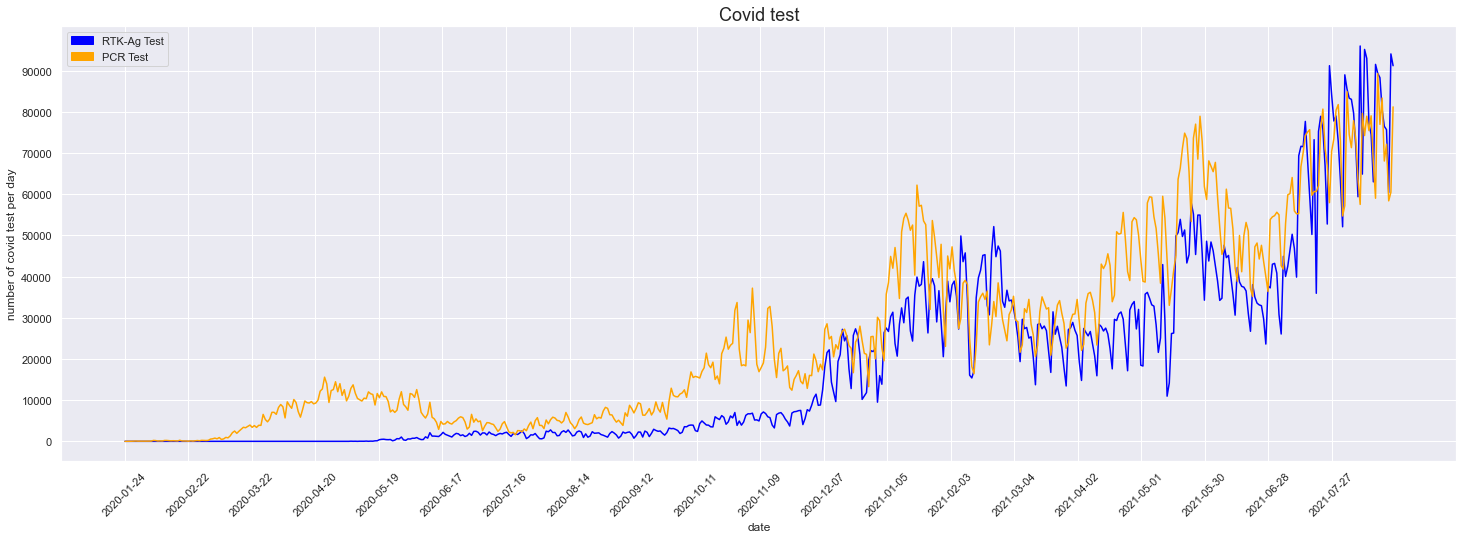

In [36]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=data_test_Malaysia, x='date', y='rtk-ag', color='blue')  
sns.lineplot(data=data_test_Malaysia, x='date', y='pcr', color='orange') 

maximum_y = max(max(data_test_Malaysia['pcr']), max(data_test_Malaysia['rtk-ag']))  #find which column will be the max y-axis

plt.xticks(np.arange(0, len(data_test_Malaysia), step=len(data_test_Malaysia) / 20), rotation=45)
plt.yticks(np.arange(0, maximum_y, step=10000))
plt.ticklabel_format(axis='y', scilimits=(0, maximum_y))  #this is set y scale from exponent value to actual value

#create legend
rtk_line = mpatches.Patch(color='blue', label='RTK-Ag Test')
pcr_line = mpatches.Patch(color='orange', label='PCR Test')
plt.legend(handles=[rtk_line, pcr_line])

plt.xlabel('date')
plt.ylabel('number of covid test per day')
plt.title('Covid test', fontsize=18)
plt.show()

It seems like more people will take PCR test at the beginning, but starting from july 2021, the number of covid test for these both type are nearly the same.

In [37]:
print(data_test_Malaysia.info())
print(data_Covid_Malaysia.info())

data_test_cases_death = pd.merge(data_test_Malaysia, data_Covid_Malaysia[['date', 'cases_new']], how='inner', on='date')

data_test_cases_death.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    579 non-null    object
 1   rtk-ag  579 non-null    int64 
 2   pcr     579 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 1 to 579
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     579 non-null    object 
 1   cases_new                579 non-null    int64  
 2   cluster_import           238 non-null    float64
 3   cluster_religious        238 non-null    float64
 4   cluster_community        238 non-null    float64
 5   cluster_highRisk         238 non-null    float64
 6   cluster_education        238 non-null    float64
 7   cluster_detentionCentre  238 non-null    float64
 8   cluster_wor

date  rtk-ag  pcr  cases_new
0  2020-01-26       0   14          0
1  2020-01-27       0   24          0
2  2020-01-28       0   53          0
3  2020-01-29       0   71          3
4  2020-01-30       0   42          1

In [38]:
data_test_cases_death['total_test'] = data_test_cases_death['rtk-ag'] + data_test_cases_death['pcr']  #To get total test per day
data_test_cases_death['positive_rate'] = round(data_test_cases_death['cases_new'] / data_test_cases_death['total_test'] * 100, 2)

column_names = ["date", "rtk-ag", "pcr", "total_test", "cases_new", "positive_rate"]
data_test_cases_death = data_test_cases_death.reindex(columns=column_names)

print(data_test_cases_death.tail())
print(data_test_cases_death.info())

           date  rtk-ag    pcr  total_test  cases_new  positive_rate
572  2021-08-20   76509  68075      144584      23564          16.30
573  2021-08-21   75698  72152      147850      22262          15.06
574  2021-08-22   60426  58409      118835      19807          16.67
575  2021-08-23   94094  60500      154594      17672          11.43
576  2021-08-24   91230  81227      172457      20837          12.08
<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           577 non-null    object 
 1   rtk-ag         577 non-null    int64  
 2   pcr            577 non-null    int64  
 3   total_test     577 non-null    int64  
 4   cases_new      577 non-null    int64  
 5   positive_rate  577 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 31.6+ KB
None


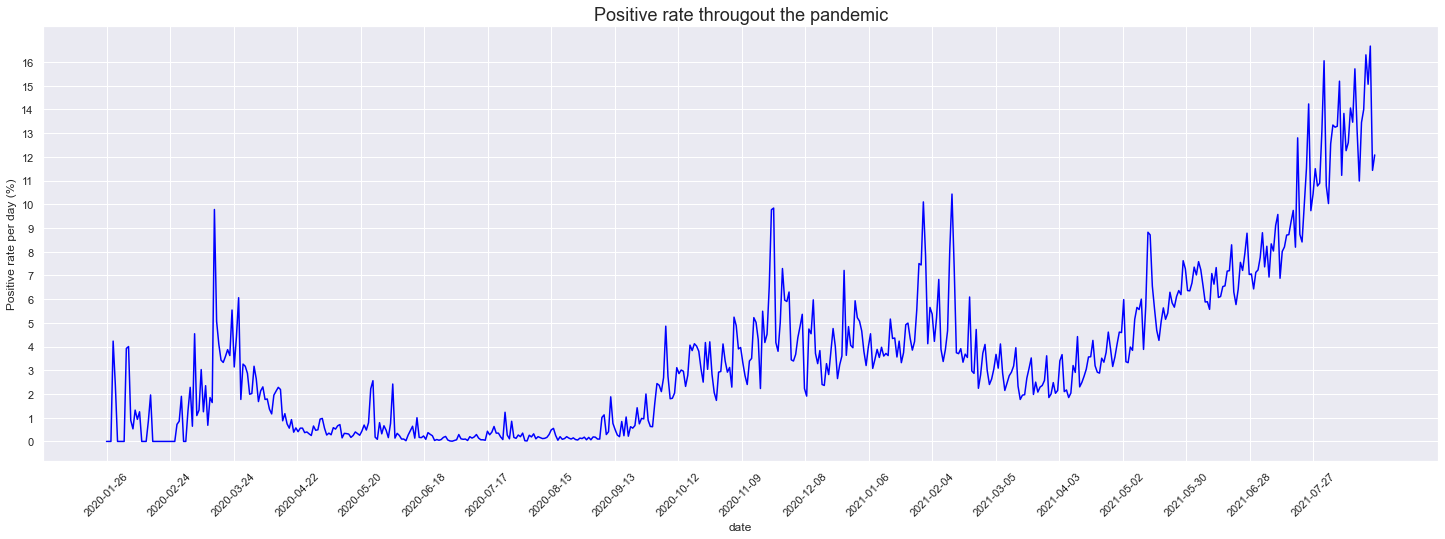

In [39]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=data_test_cases_death, x='date', y='positive_rate', color='blue')  
plt.xticks(np.arange(0, len(data_test_cases_death), step=len(data_test_cases_death) / 20), rotation=45)
plt.yticks(np.arange(0, max(data_test_cases_death['positive_rate']), step=1))
plt.ticklabel_format(axis='y', scilimits=(0, max(data_test_cases_death['positive_rate'])))  #this is set y scale from exponent value to actual value
plt.xlabel('date')
plt.ylabel('Positive rate per day (%)')
plt.title('Positive rate througout the pandemic', fontsize=18)
plt.show()

# Reference

- https://github.com/codeforamerica/click_that_hood/blob/master/public/data/malaysia.geojson
- https://github.com/MoH-Malaysia/covid19-public